## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Imports
from statistics import *
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_1samp, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Specify the columns for the UCI dataset
cols = [
    'party',
    'handicapped-infants',
    'water-project',
    'budget',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups',
    'anti-satellite-ban',
    'aid-to-contras',
    'mx-missile',
    'immigration',
    'synfuels',
    'education',
    'right-to-sue',
    'crime',
    'duty-free',
    'south-africa',
    ]


# Assign the url string to a variable
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

# Fetch the csv data assuming no header row in the data"
#   1. assign the column names specified above
#   2. replace '?' with NaN values
df_house = pd.read_csv(url, header=None, names=cols, na_values='?')

# Translate 'y' and 'n' votes to numeric '1' and'0'
df_house = df_house.replace({'y': 1, 'n': 0})


In [84]:
# Calculate the mean vote for each issue across the house
dct_vote_means = {}
for i in range(1, len(cols)):
  # Grab the vote data into a series
  seris_tmp = df_house[cols[i]]

  # Remove nas from the series
  seris_tmp = seris_tmp.dropna()

  # Assign the "mean" vote to a dict for use downstream
  dct_vote_means[cols[i]] = seris_tmp.mean()

dct_vote_means

{'aid-to-contras': 0.5761904761904761,
 'anti-satellite-ban': 0.5676959619952494,
 'budget': 0.5966981132075472,
 'crime': 0.5933014354066986,
 'duty-free': 0.4275184275184275,
 'education': 0.42326732673267325,
 'el-salvador-aid': 0.5047619047619047,
 'handicapped-infants': 0.44208037825059104,
 'immigration': 0.5046728971962616,
 'mx-missile': 0.5012106537530266,
 'physician-fee-freeze': 0.41745283018867924,
 'religious-groups': 0.6415094339622641,
 'right-to-sue': 0.5097560975609756,
 'south-africa': 0.8126888217522659,
 'synfuels': 0.36231884057971014,
 'water-project': 0.5038759689922481}

In [0]:
# Set up some "constants"
num_samples     = 10
num_sample_size = 20

In [0]:
# sample_me returns a list of means of house vote samples for use downstream
#    issue: the issue being voted on
#    num: number of samples to be taken
#    size: sample size (# of votes in sample)
def sample_me(issue, num, size):
  # Set up working variables
  rt_list = [] # return a list of means

  # Generate a series of the issue's votes
  srs_tmp = df_house[issue]
  # Drop nas from the series votes
  srs_tmp = srs_tmp.dropna()

  # Number of votes on this issue
  tot_vts = len(srs_tmp)

  # Iterate to create 'num' sample means
  for i in range(1, num+1):
    # Randomly select a sample of 'size'
    smpl_iter = srs_tmp.sample(n=size)

    # Generate the mean of the sample
    tmp_mean = smpl_iter.mean()

    # Add the mean to our return list
    rt_list.append(tmp_mean)
  
  # Return the temp series and list of sample means
  return {"means": rt_list, "series": srs_tmp}
   

In [0]:
# gen_conf_intvls generates a confidence interval for a house issue generating 'num_samples' samples each with a sample size of 'num_sample_size'
def gen_conf_intvls(issue):
  # Generate 10 samples of 20 votes of issue 'issue'
  rslts_sample = sample_me(issue, num_samples, num_sample_size)

  tmp_means = rslts_sample["means"]
  # Determine the sample size
  n = len(tmp_means)

  # Determine the 'degrees of freedom'
  dof = n - 1

  # Calculate the mean of the sample means
  sample_mean = mean(tmp_means)

  # Calculate the standard deviation of the sample means
  sample_std = np.std(tmp_means, ddof=1)

  # Calclate the standard error of the sample means
  sample_std_err = sample_std/(n**.5)

  # Generate the confidence interval
  conf_int = t.interval(.95, dof, loc=sample_mean, scale=sample_std_err)

  # Return output
  return {"lower": conf_int[0], "mean": sample_mean, "upper": conf_int[1], "list_means": tmp_means}


In [0]:
# Iterate through our issues
lst_datfrm = []     # list of issue confidence intervals

for i in range(1, len(cols)):
  # Generate the confidence interval 
  tmp_rslts = gen_conf_intvls(cols[i])

  # Construct a dataframe row for use downstream

  # Start with adding the issue, CI lower bound, mean, and CI upper bound
  tmp_row = [cols[i], tmp_rslts["lower"], tmp_rslts["mean"], tmp_rslts["upper"]]

  # Then add the sample means
  for i in range(0, len(tmp_rslts["list_means"])):
    tmp_row.append(tmp_rslts["list_means"][i])

  # Append to a working list of rows which will (ultimately) make up our dataframe
  lst_datfrm.append(tmp_row) 


In [0]:
# Create a dataframe of confidence interval results

# Construct a list of column names
df_cols = ['Issue', 'LowerBound', 'Mean', 'UpperBound']
for i in range(1, num_samples+1):
  df_cols.append(int(i))

# Create a dataframe that includes the confidence interval, mean, and sample means for each issue
df_issue_CIs = pd.DataFrame(lst_datfrm, columns=df_cols)

In [90]:
df_issue_CIs

,Issue,LowerBound,Mean,UpperBound,1,2,3,4,5,6,7,8,9,10
0,handicapped-infants,0.380906,0.445,0.509094,0.45,0.45,0.40,0.35,0.60,0.40,0.55,0.30,0.45,0.50
1,water-project,0.406121,0.500,0.593879,0.70,0.65,0.60,0.50,0.45,0.45,0.35,0.60,0.35,0.35
2,budget,0.571018,0.625,0.678982,0.55,0.55,0.60,0.55,0.75,0.70,0.70,0.65,0.65,0.55
3,physician-fee-freeze,0.284321,0.380,0.475679,0.30,0.35,0.55,0.30,0.45,0.45,0.60,0.35,0.30,0.15
4,el-salvador-aid,0.377774,0.475,0.572226,0.45,0.50,0.50,0.70,0.65,0.35,0.30,0.45,0.55,0.30
5,religious-groups,0.546035,0.645,0.743965,0.55,0.80,0.70,0.40,0.80,0.65,0.75,0.70,0.45,0.65
6,anti-satellite-ban,0.458068,0.530,0.601932,0.45,0.70,0.40,0.55,0.60,0.45,0.40,0.60,0.55,0.60
7,aid-to-contras,0.475819,0.570,0.664181,0.80,0.45,0.65,0.45,0.40,0.50,0.75,0.55,0.55,0.60
8,mx-missile,0.449125,0.525,0.600875,0.45,0.50,0.50,0.60,0.55,0.40,0.40,0.50,0.60,0.75
9,immigration,0.423350,0.505,0.586650,0.50,0.60,0.40,0.45,0.70,0.60,0.50,0.45,0.55,0.30



Issue - handicapped-infants: Confidence Interval:
0.3809055470556719 => Mean: 0.445 => 0.5090944529443281



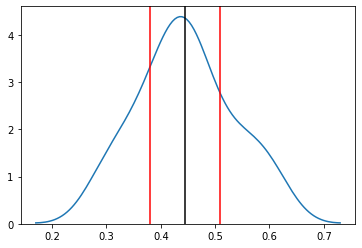


Compared to the actual vote (0.44208037825059104) the random samples t-test results in:
t Statistic: 0.10304547350855162 p-value: 0.9201864359962277

-----

Issue - water-project: Confidence Interval:
0.406121234830012 => Mean: 0.5 => 0.5938787651699879



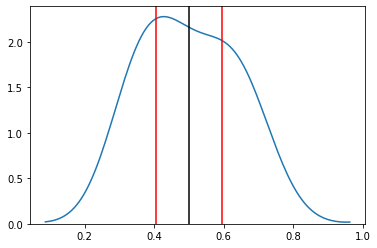


Compared to the actual vote (0.5038759689922481) the random samples t-test results in:
t Statistic: -0.09339759638401166 p-value: 0.9276338289213801

-----

Issue - budget: Confidence Interval:
0.5710180642114426 => Mean: 0.625 => 0.6789819357885574



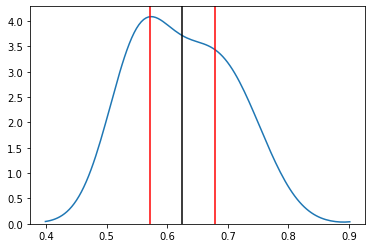


Compared to the actual vote (0.5966981132075472) the random samples t-test results in:
t Statistic: 1.186013709797397 p-value: 0.2659827337505736

-----

Issue - physician-fee-freeze: Confidence Interval:
0.2843214781062588 => Mean: 0.38 => 0.4756785218937412



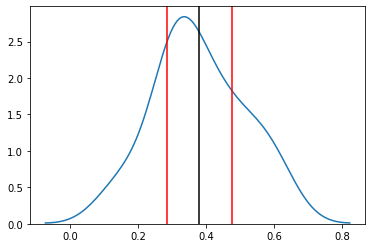


Compared to the actual vote (0.41745283018867924) the random samples t-test results in:
t Statistic: -0.8855089564441212 p-value: 0.3989230669746888

-----

Issue - el-salvador-aid: Confidence Interval:
0.3777740161867245 => Mean: 0.475 => 0.5722259838132754



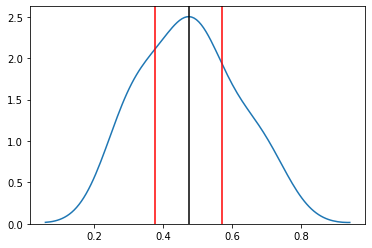


Compared to the actual vote (0.5047619047619047) the random samples t-test results in:
t Statistic: -0.6924702985084655 p-value: 0.5061143814000997

-----

Issue - religious-groups: Confidence Interval:
0.5460351126389331 => Mean: 0.645 => 0.7439648873610669



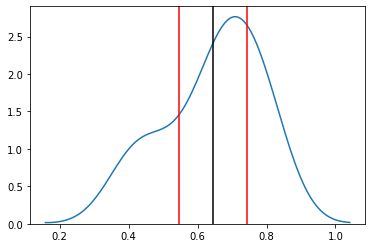


Compared to the actual vote (0.6415094339622641) the random samples t-test results in:
t Statistic: 0.07978798516160743 p-value: 0.9381518595022809

-----

Issue - anti-satellite-ban: Confidence Interval:
0.4580679867565079 => Mean: 0.53 => 0.6019320132434922



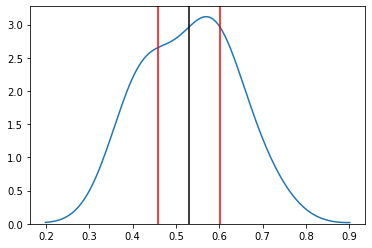


Compared to the actual vote (0.5676959619952494) the random samples t-test results in:
t Statistic: -1.1854831609579692 p-value: 0.2661819935735086

-----

Issue - aid-to-contras: Confidence Interval:
0.4758188869774661 => Mean: 0.5700000000000001 => 0.664181113022534



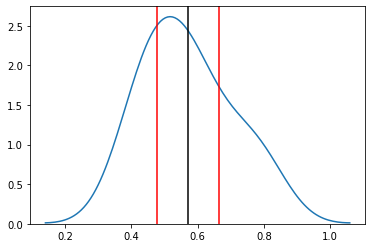


Compared to the actual vote (0.5761904761904761) the random samples t-test results in:
t Statistic: -0.14869042853329253 p-value: 0.8850762159219074

-----

Issue - mx-missile: Confidence Interval:
0.4491249421248463 => Mean: 0.525 => 0.6008750578751537



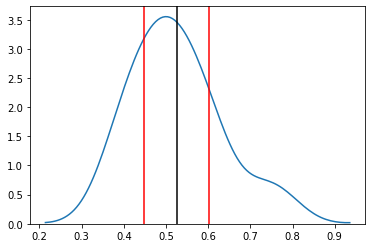


Compared to the actual vote (0.5012106537530266) the random samples t-test results in:
t Statistic: 0.709261271313493 p-value: 0.49612407984810936

-----

Issue - immigration: Confidence Interval:
0.4233496698555182 => Mean: 0.505 => 0.5866503301444818



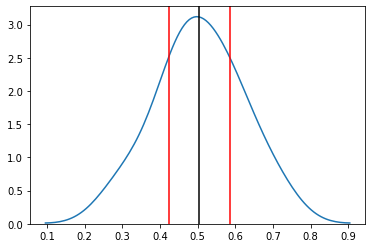


Compared to the actual vote (0.5046728971962616) the random samples t-test results in:
t Statistic: 0.00906252245545194 p-value: 0.9929669568160551

-----

Issue - synfuels: Confidence Interval:
0.2953578294198659 => Mean: 0.38 => 0.46464217058013413



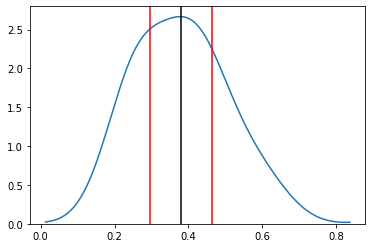


Compared to the actual vote (0.36231884057971014) the random samples t-test results in:
t Statistic: 0.47254886251182293 p-value: 0.6477839382197113

-----

Issue - education: Confidence Interval:
0.3312746194988554 => Mean: 0.41000000000000003 => 0.48872538050114467



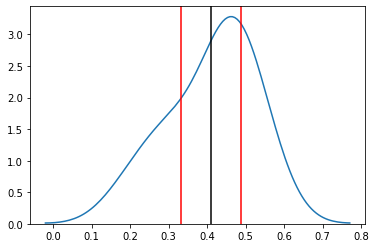


Compared to the actual vote (0.42326732673267325) the random samples t-test results in:
t Statistic: -0.38123382837515 p-value: 0.7118736241592123

-----

Issue - right-to-sue: Confidence Interval:
0.4656943801387182 => Mean: 0.55 => 0.6343056198612819



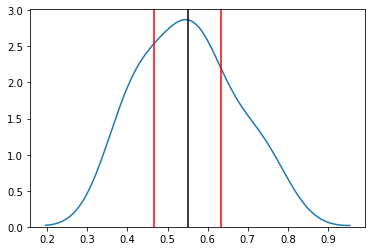


Compared to the actual vote (0.5097560975609756) the random samples t-test results in:
t Statistic: 1.0798572184023385 p-value: 0.30829289432415996

-----

Issue - crime: Confidence Interval:
0.5323117002613577 => Mean: 0.615 => 0.6976882997386423



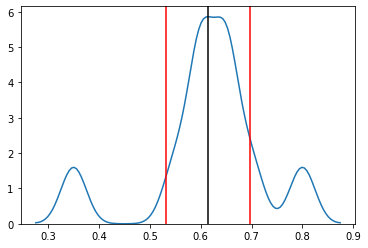


Compared to the actual vote (0.5933014354066986) the random samples t-test results in:
t Statistic: 0.5936216305218814 p-value: 0.5673829620847435

-----

Issue - duty-free: Confidence Interval:
0.3633650231798686 => Mean: 0.435 => 0.5066349768201314



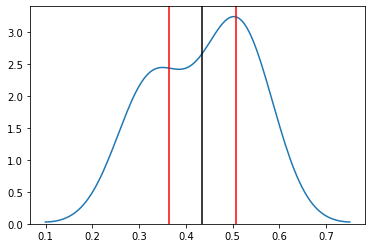


Compared to the actual vote (0.4275184275184275) the random samples t-test results in:
t Statistic: 0.23626018362860332 p-value: 0.81851996321792

-----

Issue - south-africa: Confidence Interval:
0.7309055470556719 => Mean: 0.795 => 0.8590944529443282



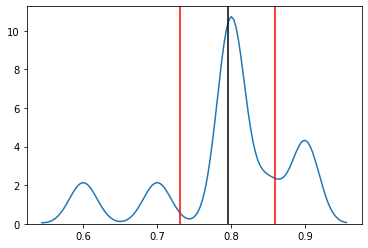


Compared to the actual vote (0.8126888217522659) the random samples t-test results in:
t Statistic: -0.6243113559623231 p-value: 0.5479202151554983

-----


In [91]:
# Iterate through each issue and output its confidence interval and plot
for idx, row in df_issue_CIs.iterrows():
  print(f'\nIssue - {row["Issue"]}: Confidence Interval:\n{row["LowerBound"]} => Mean: {row["Mean"]} => {row["UpperBound"]}\n')

  # Grab the sample means so we can generate a plot
  lst_smp_means = []
  for i in range(1, num_samples+1):
    lst_smp_means.append(row[int(i)])

  # Declare a plot object and configure
  sns.kdeplot(lst_smp_means)
  plt.axvline(x=row["LowerBound"], color='red')
  plt.axvline(x=row["UpperBound"], color='red')
  plt.axvline(x=row["Mean"], color='k')
  plt.show();

  # Conduct a 1 sample t-test of the sample means to the known vote
  t_rslt = ttest_1samp(lst_smp_means, dct_vote_means[row["Issue"]])

  print(f'\nCompared to the actual vote ({dct_vote_means[row["Issue"]]}) the random samples t-test results in:\nt Statistic: {t_rslt.statistic} p-value: {t_rslt.pvalue}\n')

  print("-----")


In [92]:
# Categorical Data
# Read in the Titanic Dataset
df_titanic = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

df_titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [93]:
# Create a crosstab dataframe of the Sex and Pclass attributes
df_xtab = pd.crosstab(df_titanic['Sex'], df_titanic['Pclass'], values=df_titanic['Survived'], aggfunc=sum, margins=True)
df_xtab

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [94]:
# Grab the dimensions of 'df_xtab'
xtb_rws = df_xtab.shape[0]
xtb_cls = df_xtab.shape[1]
idx_rws = xtb_rws-1           # row index for the margin/total cell
idx_cls = xtb_cls-1           # col index for the margin/total cell

# Save the total number of survivors in a variable
tot_lived = df_xtab.iloc[idx_rws, idx_cls]

# Generate the expected values associated with df_xtab data

# Iterate through the df_xtab dataframe and calculate expected values

# Declare a list to hold expected values
vals_xptd = [] 
for r in range(0, xtb_rws-1):
  # Create a list to hold a 'row' of expected values
  tmp_row = []

  # Loop through dataframe columns
  for c in range(0, xtb_cls-1):
    # Expected Value = (Current Column Total Value / Current Row Total Value) / Grand Total
    t_ex_val = (df_xtab.iloc[idx_rws, c] * df_xtab.iloc[r, idx_cls]) / tot_lived

    # Add the calculated expected value to the temp list
    tmp_row.append(t_ex_val)

  # Completed a row iteration - add the new row of expected values to a temp list
  vals_xptd.append(tmp_row)

vals_xptd

[[92.65497076023392, 59.271929824561404, 81.07309941520468],
 [43.345029239766085, 27.728070175438596, 37.92690058479532]]

In [95]:
# Generate a dataframe of expected values based on 'vals_xptd' 
df_exp_vals = pd.DataFrame(vals_xptd, index=['female', 'male'], columns=['PClass1', 'PClass2', 'PClass3'])

# Calculate the Chi Square Value
val_chi_sq = 0 # Initial sum value of 0

# Iterate through each row of expected values
for r in range(0, idx_rws):
  # Iterate through each column of expected values
  for c in range(0, idx_cls):
    val_chi_sq = val_chi_sq + ((df_xtab.iloc[r, c] - df_exp_vals.iloc[r, c])**2) / df_exp_vals.iloc[r, c]

# Have calcuated the Chi Square Value
print(f'Chi Square Value: {"{0:.2f}".format(val_chi_sq)}')
print(f'Degrees of Freedom: {(idx_rws-1)*(idx_cls-1)}')
print(f'From "Statistics in a Nutshell" Appendix D the upper tail critical value (2 dof @ .05) is: 5.991')

Chi Square Value: 9.37
Degrees of Freedom: 2
From "Statistics in a Nutshell" Appendix D the upper tail critical value (2 dof @ .05) is: 5.991


### Discussion

* We're comparing two attributes of the Titanic dataset: 'Sex' & 'Class'
* Our Null Hypothesis => *'Sex' & 'Calls' attributes are independent drivers for survival*
* Our Calcluated Chi Square Value is: **9.37**
* For our data the Degrees of Freedom is: **2**
* The upper critical Chi Square value for 2 degrees of freedom: **5.991**

### Assessment

As our Chi Square Value (**9.37**) is above the critical value (**5.991**) for 2 degrees of freedom, we reject the null hyplothesis that the two variables are independent in terms of inferring survival

In [96]:
# Generate the Chi Square value via Scipy

# Extract the observed values 
list_obs = []

# Iterate through the crosstab dataframe
for i in range(0, idx_rws):
  tmp_lst = list(df_xtab.iloc[i])
  del tmp_lst[-1]    # Remove the last element which is a total value

  # Add the row to the list of observations
  list_obs.append(tmp_lst)

chi_sq, p_val, dof, exp_vals = chi2_contingency(list_obs)
df_tmp = pd.DataFrame(exp_vals, )

print(f'Chi Square Value: {"{0:.2f}".format(chi_sq)}')
print(f'p-value: {"{0:.2f}".format(p_val)}')
print(f'Degrees of Freedom: {dof}\n')
df_tmp

Chi Square Value: 9.37
p-value: 0.01
Degrees of Freedom: 2



,0,1,2
0,92.654971,59.27193,81.073099
1,43.345029,27.72807,37.926901


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)